#### Import numpy, pandas, and matplot lib

In [841]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

### Part 1 - prepare the data

#### Save data to a dataframe

In [4]:
df = pd.read_excel("Backtest report TF ROC with Trailing SL Raw.xlsx")

In [7]:
df.head()

,Symbol,Trade,Date,Price,Ex. date,Ex. Price
0,BBY,Long (trail),1993-12-01,2.69328,1993-12-13,2.28996
1,EA,Long (trail),1993-12-01,8.56250,1993-12-29,7.25000
2,CMCSA,Long (trail),1993-12-01,7.82143,1994-01-25,6.31993
3,CA,Long (trail),1993-12-01,12.14810,1994-02-01,10.63700
4,BBBY,Long (trail),1993-12-01,4.31250,1994-02-03,3.55000


#### Calculate dollar and percentage profitability of each trade (Exit price - Price)

In [34]:
df['Profit dollar'] = df['Ex. Price'] - df['Price']
df['Profit percentage'] = (df['Ex. Price'] - df['Price']) / df['Price']

In [35]:
df.head()

,Symbol,Trade,Date,Price,Ex. date,Ex. Price,Profit,Profit dollar,Profit percentage
0,BBY,Long (trail),1993-12-01,2.69328,1993-12-13,2.28996,-0.40332,-0.40332,-0.149750
1,EA,Long (trail),1993-12-01,8.56250,1993-12-29,7.25000,-1.31250,-1.31250,-0.153285
2,CMCSA,Long (trail),1993-12-01,7.82143,1994-01-25,6.31993,-1.50150,-1.50150,-0.191973
3,CA,Long (trail),1993-12-01,12.14810,1994-02-01,10.63700,-1.51110,-1.51110,-0.124390
4,BBBY,Long (trail),1993-12-01,4.31250,1994-02-03,3.55000,-0.76250,-0.76250,-0.176812


#### Calculate cumulative profit 

In [39]:
df['Cumulative profit dollar'] = df['Profit dollar'].cumsum()
df['Cumulative profit percentage'] = df['Profit percentage'].cumsum()

In [48]:
df.tail()

,Symbol,Trade,Date,Price,Ex. date,Ex. Price,Profit,Profit dollar,Profit percentage,Cumulative profit dollar,Cumulative profit percentage
815,QRVO,Open Long,2016-09-13,53.92,2016-12-30,52.73,-1.19,-1.19,-0.022070,2091.01234,114.515531
816,NFLX,Open Long,2016-10-19,121.87,2016-12-30,123.80,1.93,1.93,0.015837,2092.94234,114.531367
817,CHK,Open Long,2016-11-02,5.31,2016-12-30,7.02,1.71,1.71,0.322034,2094.65234,114.853401
818,SCHW,Open Long,2016-11-02,31.06,2016-12-30,39.47,8.41,8.41,0.270766,2103.06234,115.124168
819,AIG,Open Long,2016-11-03,58.15,2016-12-30,65.31,7.16,7.16,0.123130,2110.22234,115.247297


#### Combine profit percentage into 5% chunks
#### All returns from min value to max value

In [182]:
prof_perc_max = df['Profit percentage'].max()
prof_perc_max

2.9908346972176765

In [467]:
prof_perc_min = df['Profit percentage'].min()
prof_perc_min

-0.28380840027064064

In [503]:
profit_ranges_min_max = np.linspace(prof_perc_min, prof_perc_max, num = ((prof_perc_max + abs(prof_perc_min))/0.05)+1)

In [505]:
profit_ranges_min_max

array([-0.2838084 , -0.23342928, -0.18305015, -0.13267103, -0.0822919 ,
       -0.03191278,  0.01846635,  0.06884547,  0.1192246 ,  0.16960372,
        0.21998285,  0.27036197,  0.32074109,  0.37112022,  0.42149934,
        0.47187847,  0.52225759,  0.57263672,  0.62301584,  0.67339497,
        0.72377409,  0.77415322,  0.82453234,  0.87491146,  0.92529059,
        0.97566971,  1.02604884,  1.07642796,  1.12680709,  1.17718621,
        1.22756534,  1.27794446,  1.32832359,  1.37870271,  1.42908184,
        1.47946096,  1.52984008,  1.58021921,  1.63059833,  1.68097746,
        1.73135658,  1.78173571,  1.83211483,  1.88249396,  1.93287308,
        1.98325221,  2.03363133,  2.08401045,  2.13438958,  2.1847687 ,
        2.23514783,  2.28552695,  2.33590608,  2.3862852 ,  2.43666433,
        2.48704345,  2.53742258,  2.5878017 ,  2.63818083,  2.68855995,
        2.73893907,  2.7893182 ,  2.83969732,  2.89007645,  2.94045557,
        2.9908347 ])

In [510]:
len(profit_ranges_min_max)

66

In [511]:
temp = pd.cut(df['Profit percentage'], bins = np.linspace(prof_perc_min, prof_perc_max, len(profit_ranges_min_max)))

In [512]:
temp.head()

0     (-0.183, -0.133]
1     (-0.183, -0.133]
2     (-0.233, -0.183]
3    (-0.133, -0.0823]
4     (-0.183, -0.133]
Name: Profit percentage, dtype: category
Categories (65, object): [(-0.284, -0.233] < (-0.233, -0.183] < (-0.183, -0.133] < (-0.133, -0.0823] ... (2.789, 2.84] < (2.84, 2.89] < (2.89, 2.94] < (2.94, 2.991]]

In [513]:
dist_of_returns = temp.groupby(temp).count()

In [514]:
dist_of_returns.tail()

Profit percentage
(2.739, 2.789]    0
(2.789, 2.84]     0
(2.84, 2.89]      0
(2.89, 2.94]      1
(2.94, 2.991]     1
Name: Profit percentage, dtype: int64

#### Only positive values

In [480]:
pos_ceil = np.ceil(prof_perc_max)
pos_ceil

3.0

In [515]:
pos_range = np.linspace(0, pos_ceil, num = (pos_ceil/0.05)+1)
pos_range

array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
        0.9 ,  0.95,  1.  ,  1.05,  1.1 ,  1.15,  1.2 ,  1.25,  1.3 ,
        1.35,  1.4 ,  1.45,  1.5 ,  1.55,  1.6 ,  1.65,  1.7 ,  1.75,
        1.8 ,  1.85,  1.9 ,  1.95,  2.  ,  2.05,  2.1 ,  2.15,  2.2 ,
        2.25,  2.3 ,  2.35,  2.4 ,  2.45,  2.5 ,  2.55,  2.6 ,  2.65,
        2.7 ,  2.75,  2.8 ,  2.85,  2.9 ,  2.95,  3.  ])

In [516]:
len(pos_range)

61

In [482]:
temp_pos = pd.cut(df['Profit percentage'], bins = np.linspace(0, pos_ceil, num = len(pos_range)))

In [483]:
temp_pos = temp_pos.dropna()

In [484]:
pos_dist = temp_pos.groupby(temp_pos).count()
pos_dist.tail()

Profit percentage
(2.75, 2.8]    0
(2.8, 2.85]    0
(2.85, 2.9]    0
(2.9, 2.95]    1
(2.95, 3]      1
Name: Profit percentage, dtype: int64

#### Only negative values

In [485]:
neg_floor = np.floor(prof_perc_min*10)/10
round(neg_floor,2)

-0.29999999999999999

In [486]:
neg_floor = -0.3
round(abs(neg_floor/0.05))+1

7

In [517]:
neg_range = np.linspace(neg_floor, 0, num = round(abs(neg_floor/0.05))+1)
neg_range

array([-0.3 , -0.25, -0.2 , -0.15, -0.1 , -0.05,  0.  ])

In [518]:
len(neg_range)

7

In [520]:
temp_neg = pd.cut(df['Profit percentage'], bins = np.linspace(neg_floor, 0, num = len(neg_range)))

In [521]:
temp_neg = temp_neg.dropna()

In [594]:
neg_dist = temp_neg.groupby(temp_neg).count()
neg_dist.head()

Profit percentage
(-0.3, -0.25]      1
(-0.25, -0.2]      9
(-0.2, -0.15]    105
(-0.15, -0.1]    120
(-0.1, -0.05]    111
Name: Profit percentage, dtype: int64

#### Calculating number of days in a position

In [591]:
df['Days held'] = df['Ex. date'] - df['Date']

In [593]:
df.head()

,Symbol,Trade,Date,Price,Ex. date,Ex. Price,Profit,Profit dollar,Profit percentage,Cumulative profit dollar,Cumulative profit percentage,Days held
0,BBY,Long (trail),1993-12-01,2.69328,1993-12-13,2.28996,-0.40332,-0.40332,-0.149750,-0.40332,-0.149750,12 days
1,EA,Long (trail),1993-12-01,8.56250,1993-12-29,7.25000,-1.31250,-1.31250,-0.153285,-1.71582,-0.303035,28 days
2,CMCSA,Long (trail),1993-12-01,7.82143,1994-01-25,6.31993,-1.50150,-1.50150,-0.191973,-3.21732,-0.495008,55 days
3,CA,Long (trail),1993-12-01,12.14810,1994-02-01,10.63700,-1.51110,-1.51110,-0.124390,-4.72842,-0.619398,62 days
4,BBBY,Long (trail),1993-12-01,4.31250,1994-02-03,3.55000,-0.76250,-0.76250,-0.176812,-5.49092,-0.796209,64 days


In [620]:
#Converting day_string to int
days_held = (df['Days held'] / np.timedelta64(1, 'D')).astype(int)

In [616]:
days_held.max()

2450

In [621]:
days_temp = pd.cut(days_held, bins = np.linspace(0, days_held.max(), num = 50))

In [624]:
days_temp.head()

0      (0, 50]
1      (0, 50]
2    (50, 100]
3    (50, 100]
4    (50, 100]
Name: Days held, dtype: category
Categories (49, object): [(0, 50] < (50, 100] < (100, 150] < (150, 200] ... (2250, 2300] < (2300, 2350] < (2350, 2400] < (2400, 2450]]

In [626]:
days_dist = days_temp.groupby(days_temp).count()

In [633]:
days_dist.head()

Days held
(0, 50]       310
(50, 100]     166
(100, 150]     77
(150, 200]     66
(200, 250]     44
Name: Days held, dtype: int64

#### Calculating returns by month

In [648]:
new_df = df[['Ex. date','Profit percentage']]

In [650]:
new_df.head()

,Ex. date,Profit percentage
0,1993-12-13,-0.149750
1,1993-12-29,-0.153285
2,1994-01-25,-0.191973
3,1994-02-01,-0.124390
4,1994-02-03,-0.176812


In [663]:
new_df.set_index('Ex. date',inplace=True)

In [664]:
pd.to_datetime(new_df.index,yearfirst=True)

DatetimeIndex(['1993-12-13', '1993-12-29', '1994-01-25', '1994-02-01',
               '1994-02-03', '1994-02-07', '1994-03-02', '1994-03-02',
               '1994-03-25', '1994-03-28',
               ...
               '2016-12-30', '2016-12-30', '2016-12-30', '2016-12-30',
               '2016-12-30', '2016-12-30', '2016-12-30', '2016-12-30',
               '2016-12-30', '2016-12-30'],
              dtype='datetime64[ns]', name='Ex. date', length=820, freq=None)

In [666]:
new_df.head()

,Profit percentage
Ex. date,
1993-12-13,-0.149750
1993-12-29,-0.153285
1994-01-25,-0.191973
1994-02-01,-0.124390
1994-02-03,-0.176812


In [678]:
new_df.resample('M').sum().head()

,Profit percentage
Ex. date,
1993-12-31,-0.303035
1994-01-31,-0.191973
1994-02-28,-0.411362
1994-03-31,1.079548
1994-04-30,-0.357671


In [684]:
import datetime as dt

In [823]:
heat_map = df.pivot_table(values = new_df.resample('M').sum(), index = new_df.index.year, columns = new_df.index.month, 
                          aggfunc='sum')

In [828]:
heat_map

,January,February,March,April,May,June,July,August,September,October,November,December
1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.303035
1994,-0.191973,-0.411362,1.079548,-0.357671,-0.253812,-0.015576,NaN,-0.104464,-0.027319,-0.049999,0.091946,-0.402134
1995,NaN,NaN,NaN,0.753847,0.097872,0.259352,0.555963,0.943365,4.443950,0.421646,-0.230441,0.014373
1996,1.155595,0.006451,0.402041,1.879503,0.406339,0.296377,-0.548410,-0.115137,0.013523,-0.053595,-0.209336,-0.152660
1997,-0.039448,2.246470,0.375912,0.904076,NaN,NaN,NaN,NaN,NaN,2.837499,0.611001,1.294846
1998,-0.077551,-0.089658,-0.119337,0.628134,0.712398,1.069766,-0.054948,2.108965,0.030373,0.023099,NaN,0.623030
1999,3.562766,0.146162,0.813558,2.046081,-0.265489,0.341468,0.000954,2.031095,1.198188,-0.142193,0.072031,2.562818
2000,5.718563,-0.601748,4.195648,0.391349,-0.450178,0.758369,0.630813,-0.223753,0.598349,0.431884,0.359535,NaN
2001,0.853231,NaN,0.186845,NaN,NaN,NaN,0.439356,NaN,NaN,NaN,NaN,NaN
2002,NaN,NaN,NaN,-0.586558,-0.204238,-0.536864,-0.240907,NaN,-0.052678,NaN,NaN,NaN


In [825]:
heat_map.columns = heat_map.columns.droplevel()

In [809]:
import calendar

In [819]:
x = heat_map.columns.tolist()
# for i in x:
#     x[i] = calendar.month_name[i]
x = [calendar.month_name[i] for i in x]
x

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [826]:
heat_map.columns = x

In [827]:
heat_map.columns

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object')

### Part 2 - Visualization

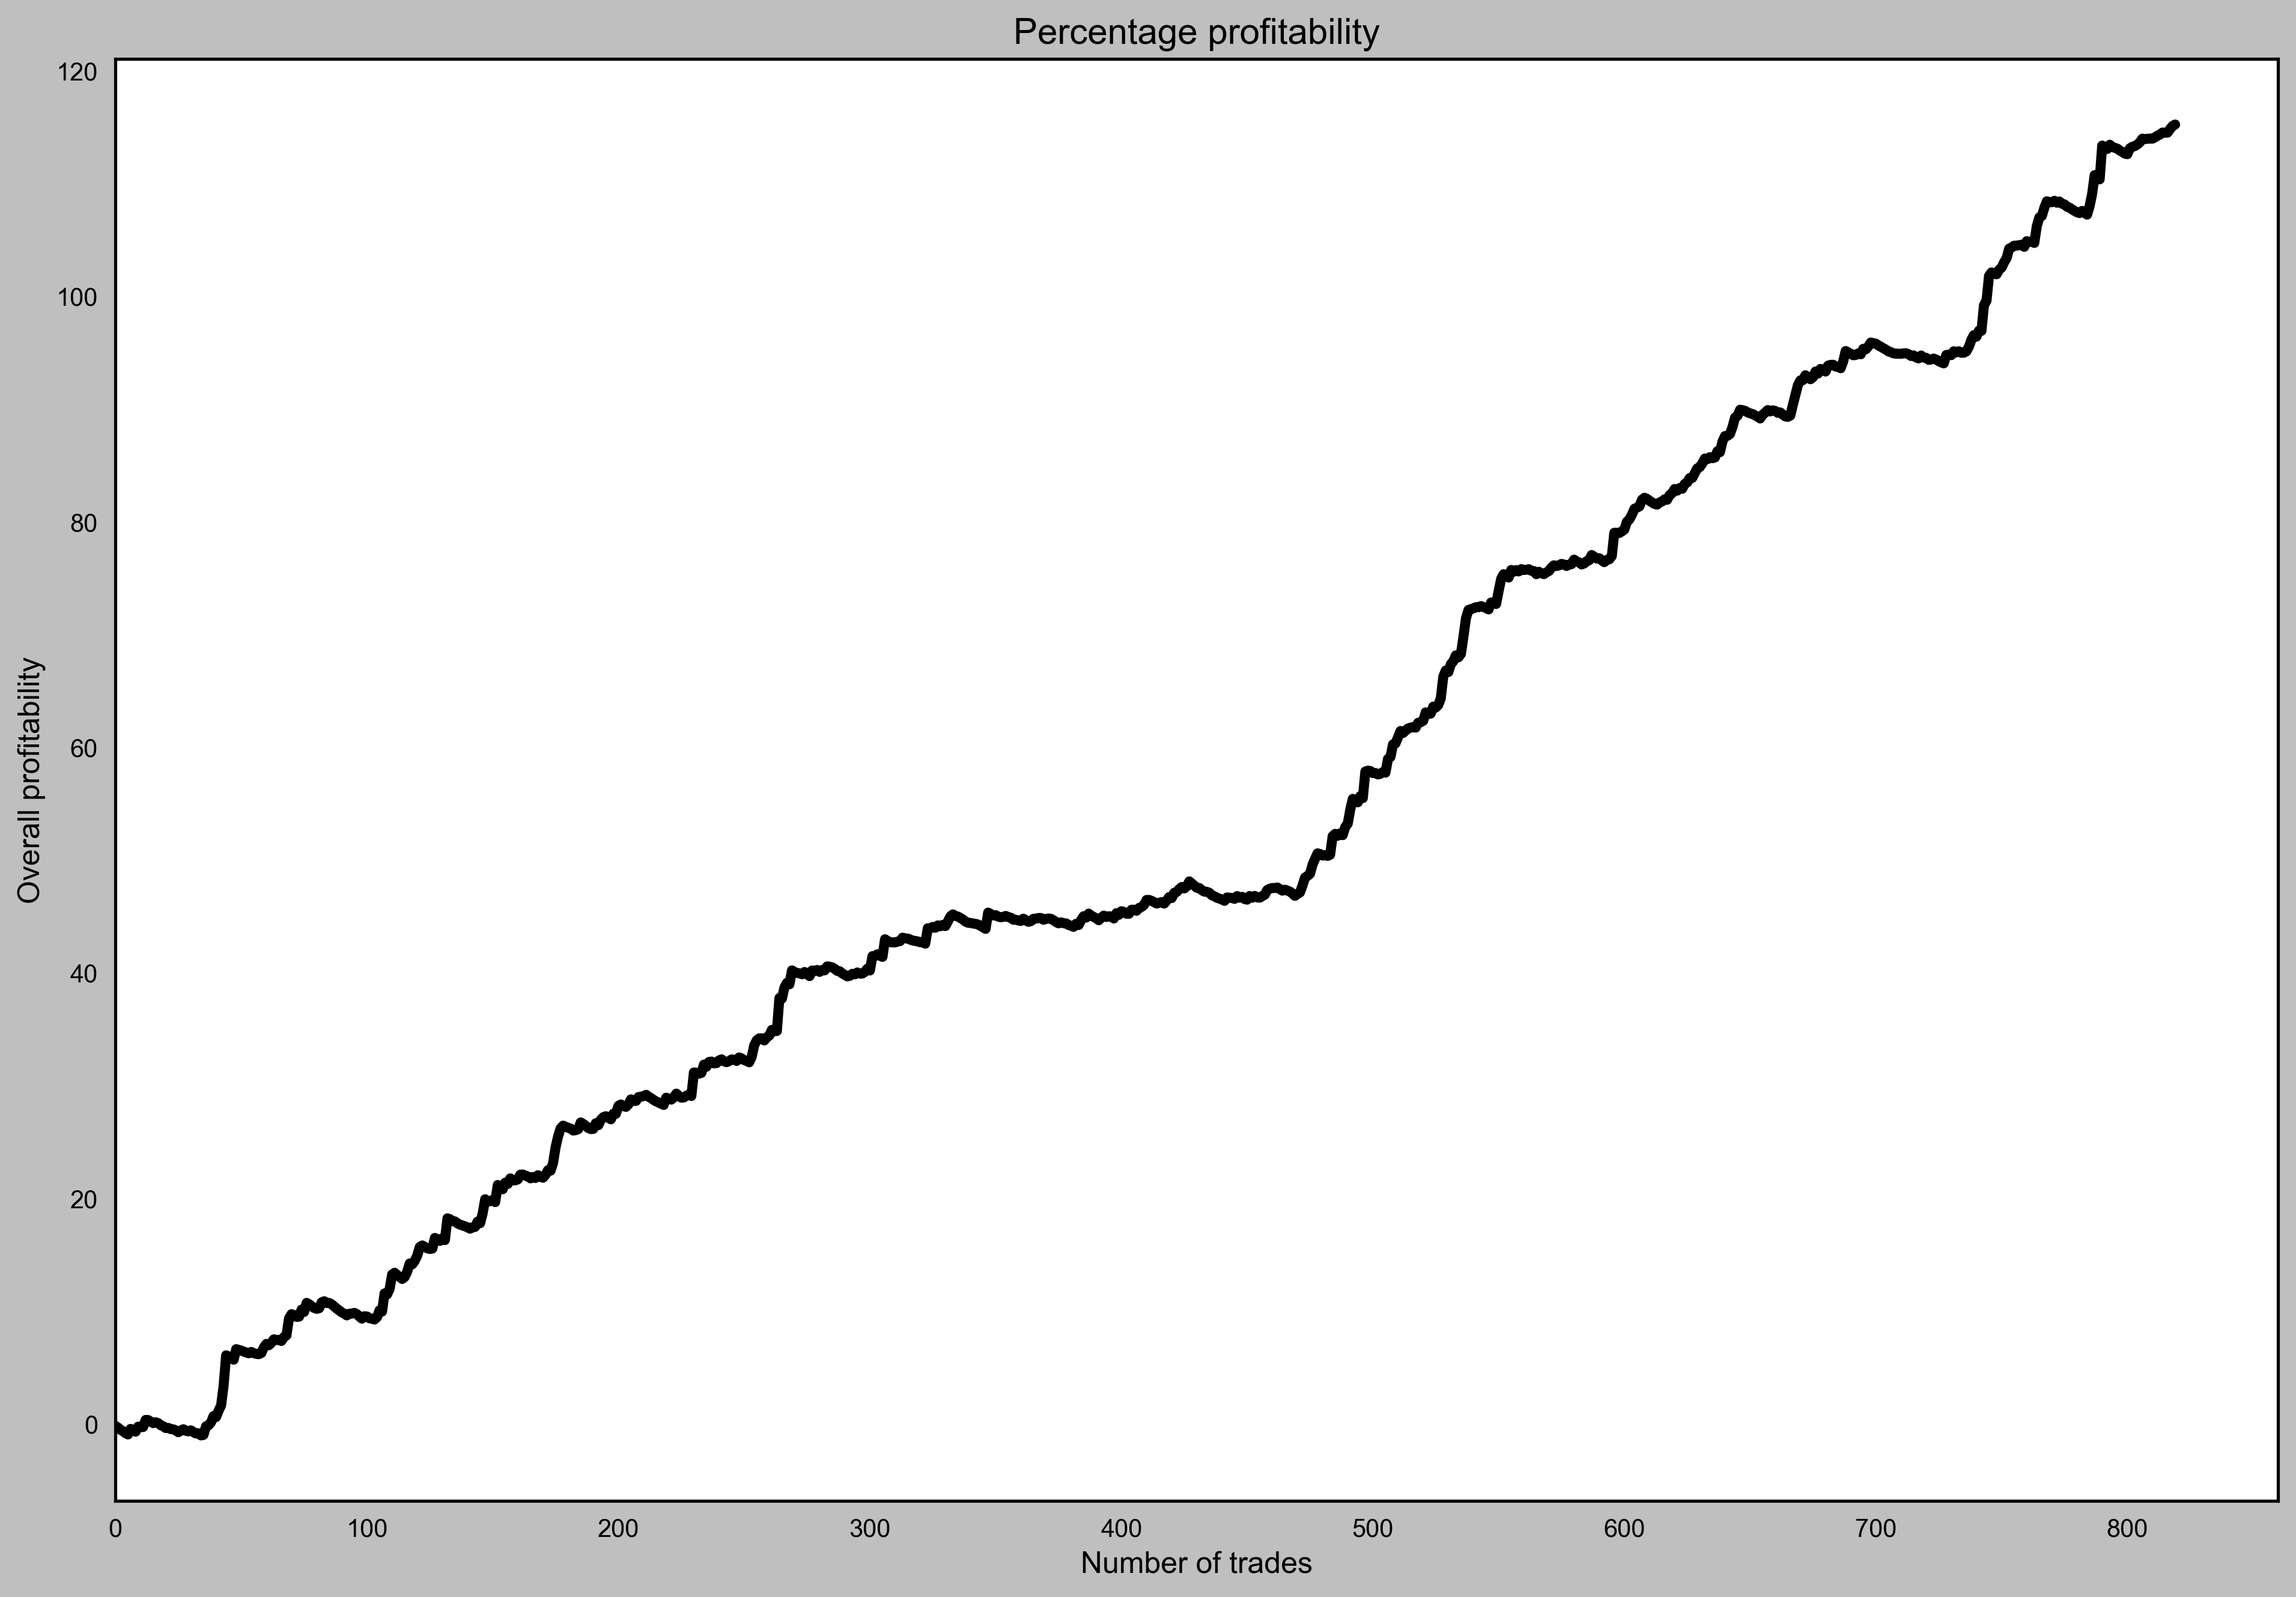

In [491]:
#Using matplotlib
plt.style.use("grayscale")
fig = plt.figure(figsize=(12,8), dpi = 300)
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(df["Cumulative profit percentage"])
axes.set_xlabel('Number of trades')
axes.set_ylabel('Overall profitability')
axes.set_title('Percentage profitability')
axes.set_xlim(xmin=0)
plt.show()

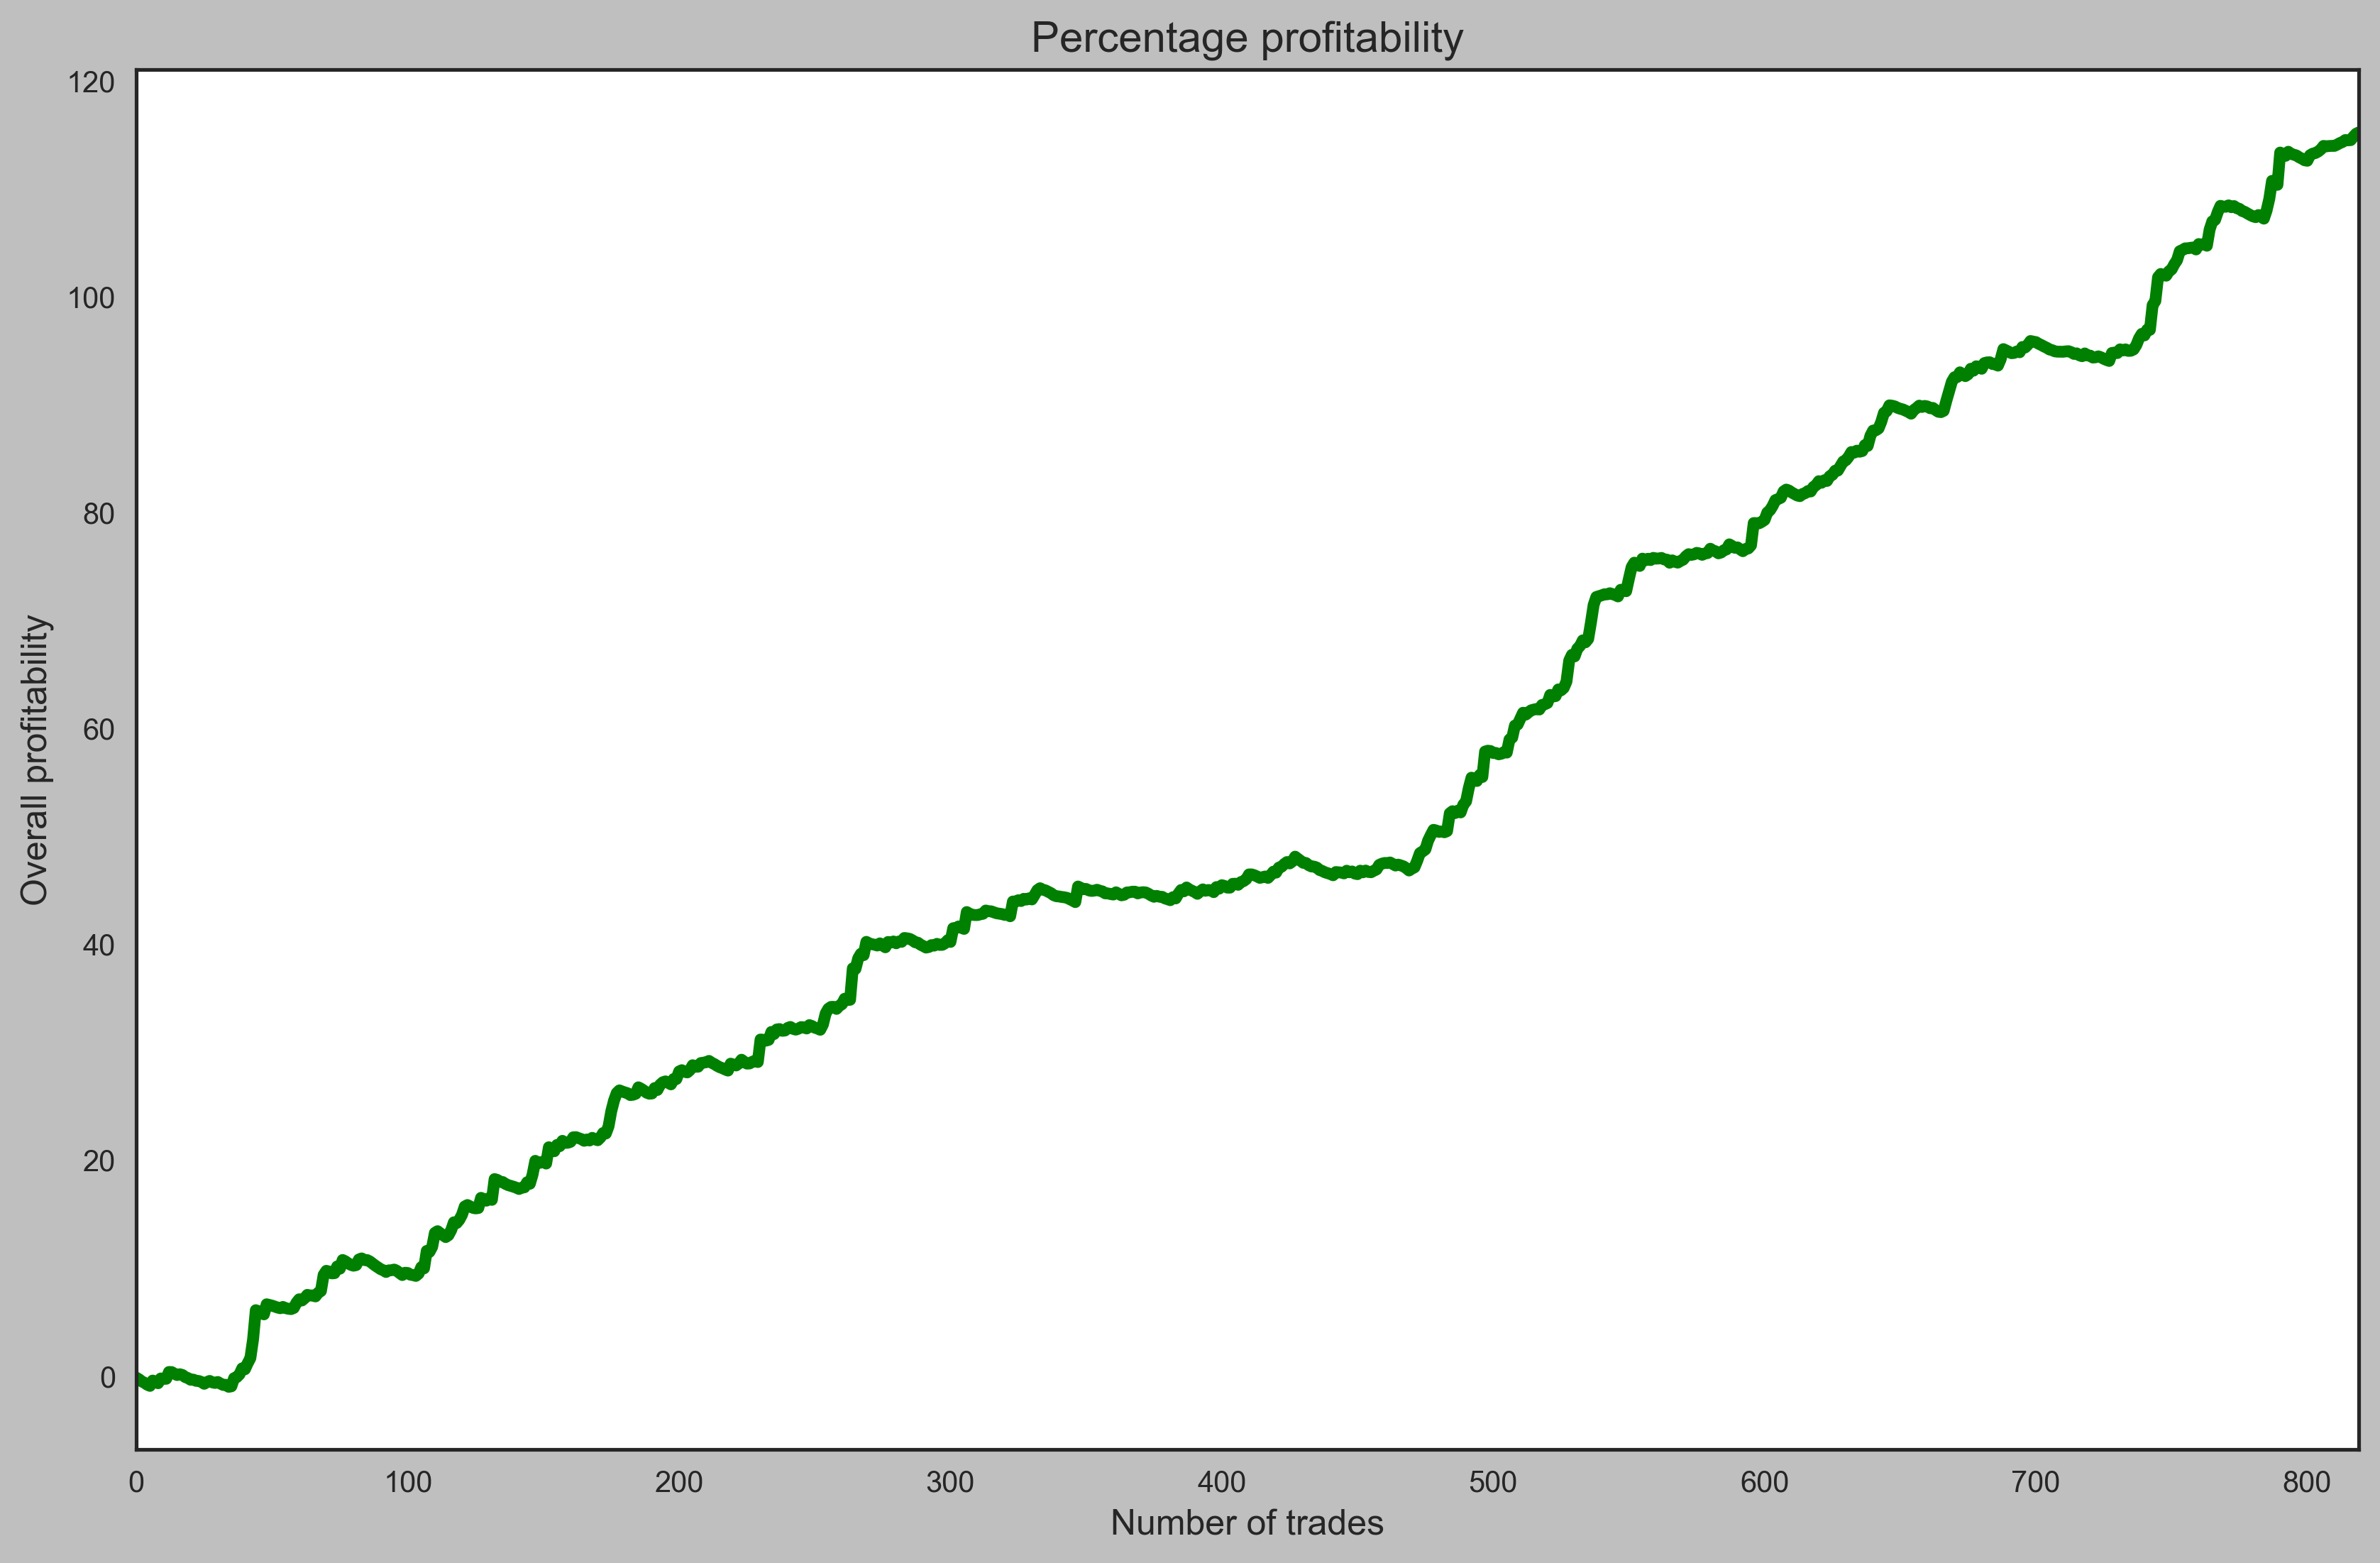

In [492]:
#Using seaborn
#Style must be one of white, dark, whitegrid, darkgrid, ticks
fig = plt.figure(figsize=(12,8), dpi = 300)
sns.set_style("white")
ax = sns.tsplot(data=df['Cumulative profit percentage'],color='green')
ax.set_xlabel('Number of trades')
ax.set_ylabel('Overall profitability')
ax.set_title('Percentage profitability')
plt.show()

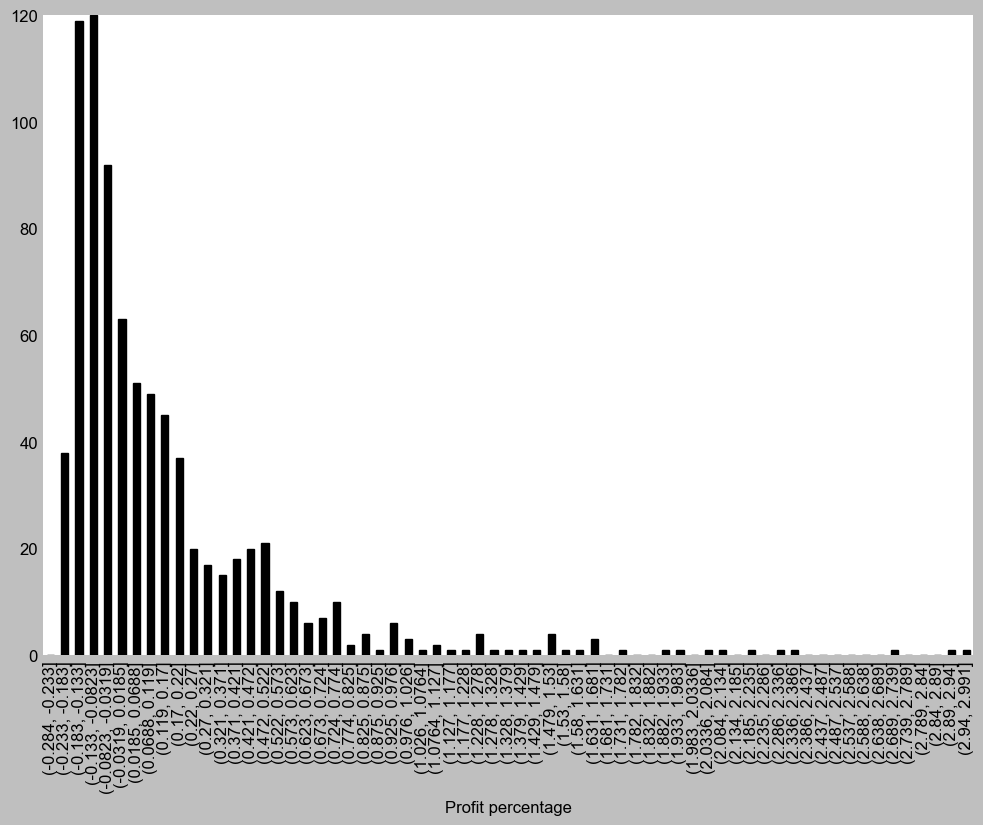

In [595]:
#Using pandas visualization
plt.style.use("grayscale")
dist_of_returns.plot.bar(figsize=(12,8))
plt.show()

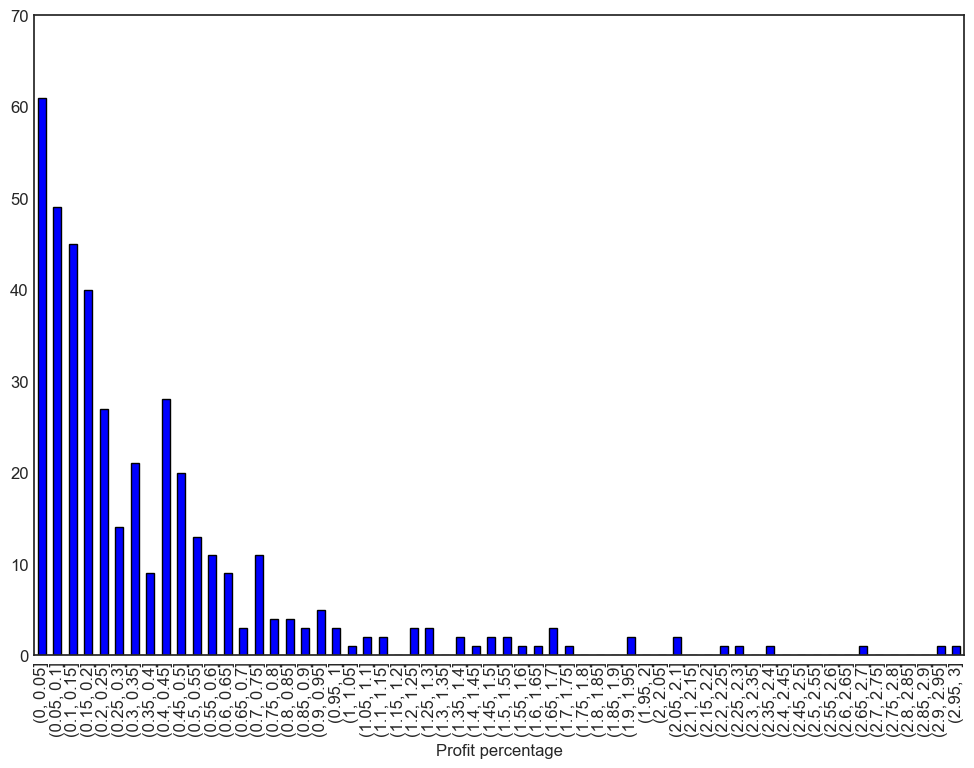

In [574]:
plt.style.use("seaborn-white")
pos_dist.plot.bar(figsize=(12,8))
plt.show()

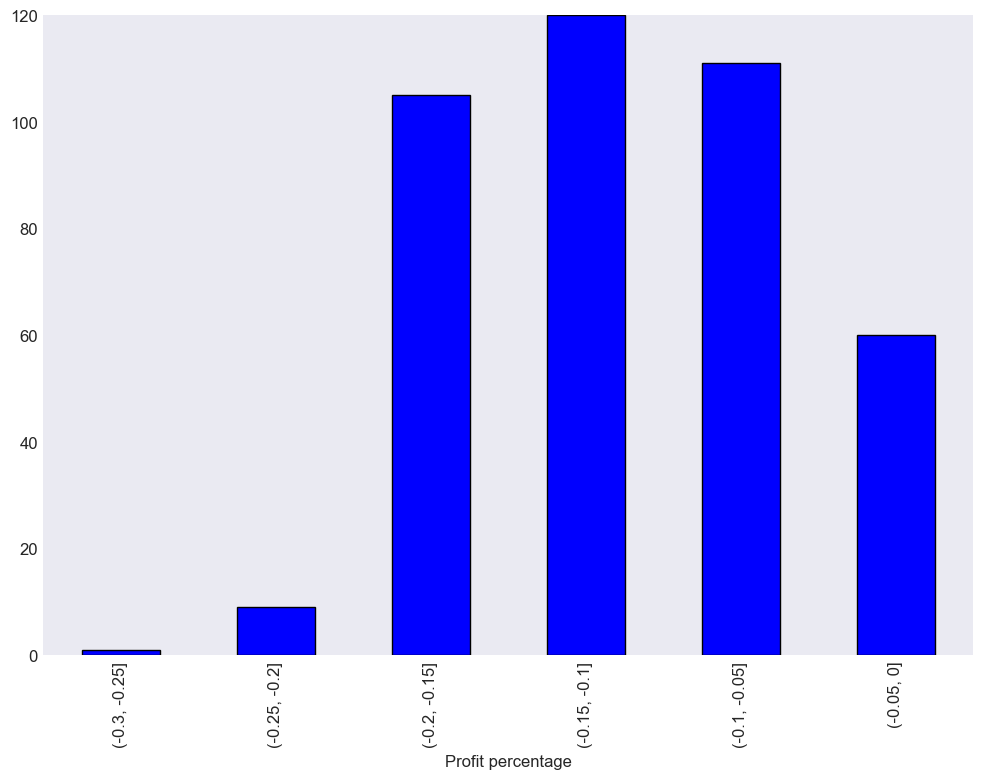

In [575]:
plt.style.use("seaborn-dark")
neg_dist.plot.bar(figsize=(12,8))
plt.show()

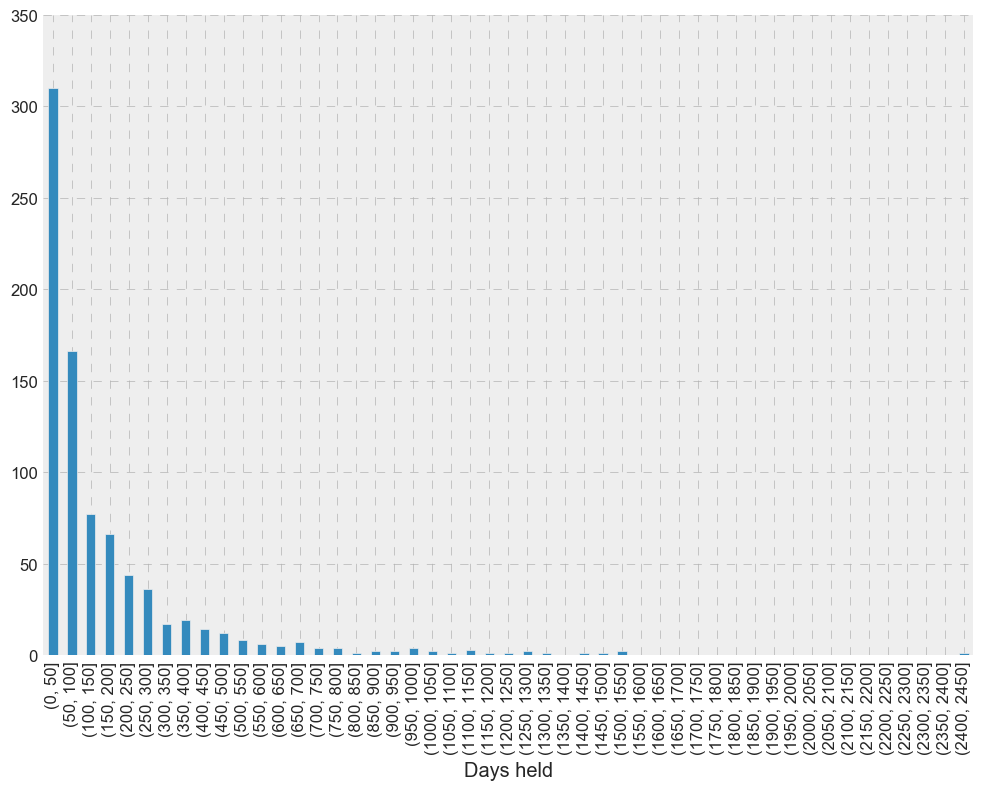

In [632]:
plt.style.use("bmh")
days_dist.plot.bar(figsize=(12,8))
plt.show()

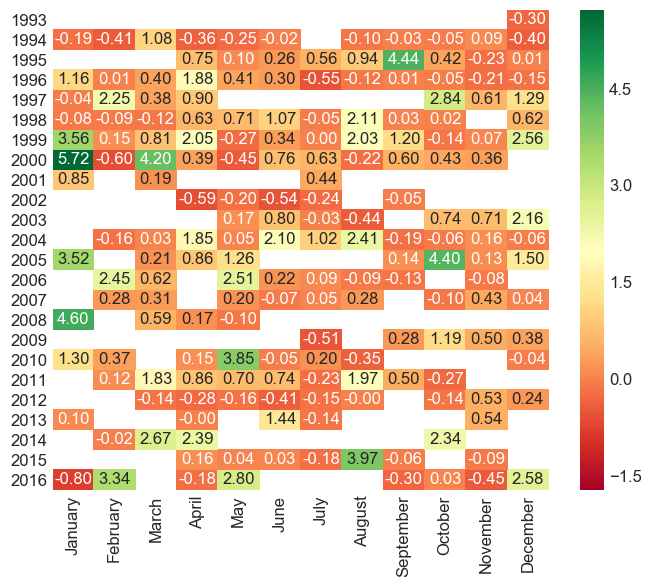

In [881]:
#White cells mean the strategy did not make any trades
plt.style.use("seaborn-whitegrid")
sns.heatmap(heat_map, center = 2, annot=True, fmt="0.2f", cmap = 'RdYlGn')
plt.show()

### The End